In [30]:
import pandas as pd

In [31]:

# Assuming you've loaded the CSV into combined_week1_order_data DataFrame
# Load the CSV file into a DataFrame
combined_week2_order_data = pd.read_csv("combined_week2_order_data.csv")

combined_week2_order_data['Completed (%)'] = combined_week2_order_data['Completed (%)'].str.rstrip('%').astype(float)

# Group by 'delivery_runs'
delivery_runs_grouped = combined_week2_order_data.groupby('Delivery Run')

# Calculate average % of line completion
avg_line_completion = delivery_runs_grouped['Completed (%)'].mean().sort_values(ascending=False)

# Calculate total lines
total_lines = delivery_runs_grouped['Total Lines'].sum().sort_values(ascending=False)

# Calculate average amount of lines
avg_lines = delivery_runs_grouped['Total Lines'].mean().sort_values(ascending=False)

# Calculate how many lines were picked
lines_picked = delivery_runs_grouped['Picked Lines'].sum().sort_values(ascending=False)

# Calculate the average units picked
avg_units_picked = delivery_runs_grouped['Units Picked'].mean()

# Rank the runs by total units ordered
ranked_by_units_ordered = delivery_runs_grouped['Units Ordered'].sum().sort_values(ascending=False)

# Rank the runs by units picked
ranked_by_units_picked = delivery_runs_grouped['Units Picked'].sum().sort_values(ascending=False)

# Display the results
print("Average % of line completion:")
print(avg_line_completion)

print("\nTotal lines:")
print(total_lines)

print("\nAverage amount of lines:")
print(avg_lines)

print("\nLines picked:")
print(lines_picked)

print("\nAverage units picked:")
print(avg_units_picked)

print("\nRuns ranked by total units ordered:")
print(ranked_by_units_ordered)

print("\nRuns ranked by units picked:")
print(ranked_by_units_picked)


Average % of line completion:
Delivery Run
Dingo Run                    100.000000
Shute                         99.090000
Proserpine Run                98.402000
North Mackay                  98.290000
Cannonvale                    98.286667
Pallet Run 2                  98.226667
Pallet Run 1                  98.153333
Mackay                        97.375000
Collinsville                  97.270000
Pallet Run 3                  97.200000
Pallet                        97.110000
2nd Run                       96.200000
Bowen                         95.512500
Airlie Run                    95.276667
Hayman Diner                  93.332000
Pick Up Window 2              89.615714
Hayman Retail                 88.950000
pick Up Window 1              84.875000
Hamilton Island               76.402857
Hayman Island                 75.000000
Hamilton Island Warehouse     74.208000
Hayman Stores                 72.610000
Hayman Comms                  71.297500
Daydream                      71.0100

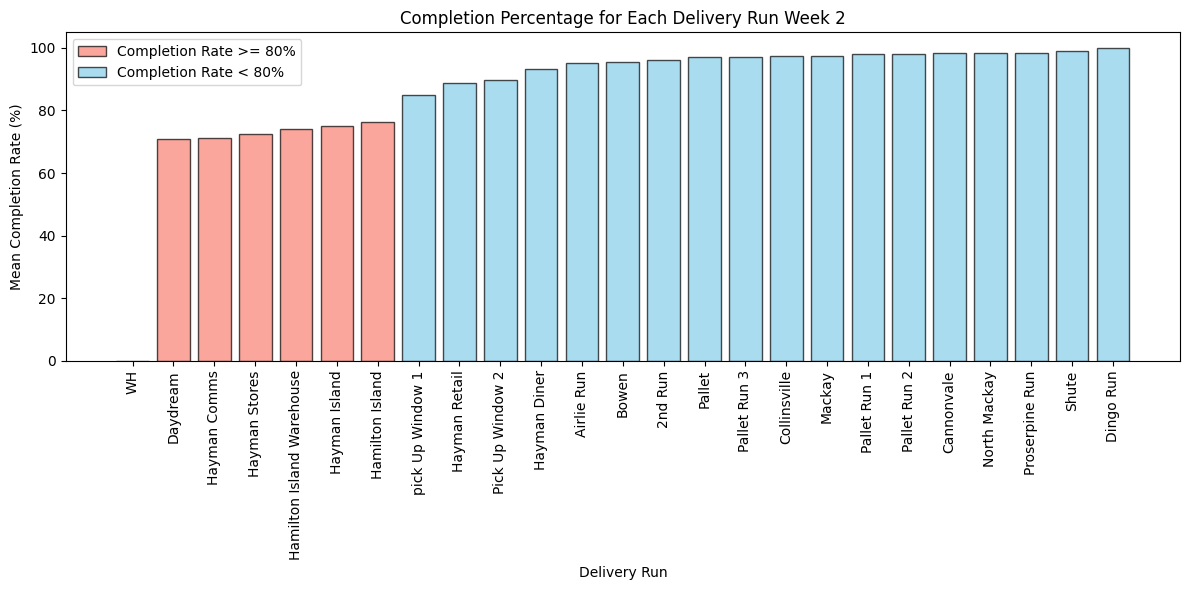

In [48]:
import matplotlib.pyplot as plt

# Calculate mean completion rate for each delivery run
mean_completion_rate = combined_week2_order_data.groupby('Delivery Run')['Completed (%)'].mean().sort_values()

# Define a threshold (e.g., 80%)
threshold = 80

# Create a list of colors based on the completion rate
colors = ['skyblue' if rate >= threshold else 'salmon' for rate in mean_completion_rate.values]

# Create a bar plot for completion percentages of all delivery runs
plt.figure(figsize=(12, 6))
bars = plt.bar(mean_completion_rate.index, mean_completion_rate.values, color=colors, alpha=0.7, edgecolor='black')

plt.xlabel('Delivery Run')
plt.ylabel('Mean Completion Rate (%)')
plt.title('Completion Percentage for Each Delivery Run Week 2')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Create a custom legend for color reference
plt.legend(handles=[bars[0], bars[-1]], labels=['Completion Rate >= 80%', 'Completion Rate < 80%'])

plt.tight_layout()
plt.show()


In [32]:


# Filter the DataFrame for specific dates (01/12/23 and 03/12/23)
specific_dates = combined_week2_order_data[
    (combined_week2_order_data['Date'] == '2023-12-07') | (combined_week2_order_data['Date'] == '2023-12-10')
]

# Filter the rest of the week (excluding 01/12/23 and 03/12/23)
rest_of_week = combined_week2_order_data[
    ~(combined_week2_order_data['Date'].isin(['2023-12-07', '2023-12-10']))
]

# Perform analysis for specific dates
specific_dates_stats = specific_dates.groupby('Delivery Run').agg({
     'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Perform analysis for the rest of the week
rest_of_week_stats = rest_of_week.groupby('Delivery Run').agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific dates and the rest of the week
print("Statistics for specific dates (07/12/23 and 10/12/23):")
print(specific_dates_stats)

print("\nStatistics for the rest of the week:")
print(rest_of_week_stats)


Statistics for specific dates (07/12/23 and 10/12/23):
                           Completed (%)  Total Lines  Picked Lines  \
Delivery Run                                                          
2nd Run                            93.48           46            43   
Airlie Run                         97.28          257           250   
Bowen                              91.18           68            62   
Cannonvale                         98.05          154           151   
Daydream                           92.33          365           337   
Hamilton Island                    93.22           59            55   
Hamilton Island Warehouse          75.00           20            15   
Hayman Comms                       79.86          283           226   
Hayman Retail                      96.43           56            54   
Hayman Stores                      90.70           43            39   
Mackay                             97.48          477           465   
Pallet Run 1          

In [33]:


# Filter the DataFrame for specific locations
specific_locations = combined_week2_order_data[
    (combined_week2_order_data['Delivery Run'].isin(['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']))
]

# Perform analysis for specific locations
specific_locations_stats = specific_locations.groupby('Delivery Run').agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific locations
print("Statistics for specific locations:")
print(specific_locations_stats)




Statistics for specific locations:
              Completed (%)  Total Lines  Picked Lines  Units Picked  \
Delivery Run                                                           
Airlie Run        95.276667          750           718    321.500000   
Bowen             95.512500          399           382    340.750000   
Cannonvale        98.286667          651           638    298.833333   
Mackay            97.375000         1895          1845    855.833333   
North Mackay      98.290000          234           230    223.000000   
Pallet            97.110000          484           470   1160.000000   
Pallet Run 1      98.153333          562           552    398.666667   
Pallet Run 2      98.226667          678           671    376.333333   
Pallet Run 3      97.200000          289           280    254.500000   

              Units Ordered  
Delivery Run                 
Airlie Run             2008  
Bowen                  1441  
Cannonvale             1832  
Mackay                

### NOTES ###
North Mackay and Pallet had to be dropped from this weeks data set due to poor data pulled from SQL. It had errors. 

In [39]:


# Convert 'Date' column to datetime if it's not already
combined_week2_order_data['Date'] = pd.to_datetime(combined_week2_order_data['Date'])

# Filter the DataFrame for specific dates 
specific_dates = combined_week2_order_data[
    (combined_week2_order_data['Date'].isin(['2023-12-07', '2023-12-10'])) &
    (combined_week2_order_data['Delivery Run'].isin([ 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale']))
]

# Filter the rest of the week (excluding specific dates) for specific locations
rest_of_week = combined_week2_order_data[
    ~(combined_week2_order_data['Date'].isin(['2023-12-07', '2023-12-10'])) &
    (combined_week2_order_data['Delivery Run'].isin([ 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale']))
]

# Perform analysis for specific dates and specific locations
specific_dates_stats = specific_dates.groupby(['Date', 'Delivery Run']).agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Perform analysis for the rest of the week and specific locations
rest_of_week_stats = rest_of_week.groupby(['Date', 'Delivery Run']).agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific dates and specific locations
print("Statistics for specific dates (07/12/23 and 10/12/23) and specific locations:")
print(specific_dates_stats)

print("\nStatistics for the rest of the week and specific locations:")
print(rest_of_week_stats)


Statistics for specific dates (07/12/23 and 10/12/23) and specific locations:
                         Completed (%)  Total Lines  Picked Lines  \
Date       Delivery Run                                             
2023-12-10 Airlie Run            97.28          257           250   
           Bowen                 91.18           68            62   
           Cannonvale            98.05          154           151   
           Mackay                97.48          477           465   
           Pallet Run 1          97.97          148           145   
           Pallet Run 2          98.41          126           124   
           Pallet Run 3          98.44           64            63   

                         Units Picked  Units Ordered  
Date       Delivery Run                               
2023-12-10 Airlie Run           655.0            661  
           Bowen                218.0            232  
           Cannonvale           461.0            463  
           Mackay        

In [35]:
print(specific_dates['Delivery Run'].unique())


['Pallet Run 3' 'Pallet Run 2' 'Cannonvale' 'Mackay' 'Bowen' 'Airlie Run'
 'Pallet Run 1']


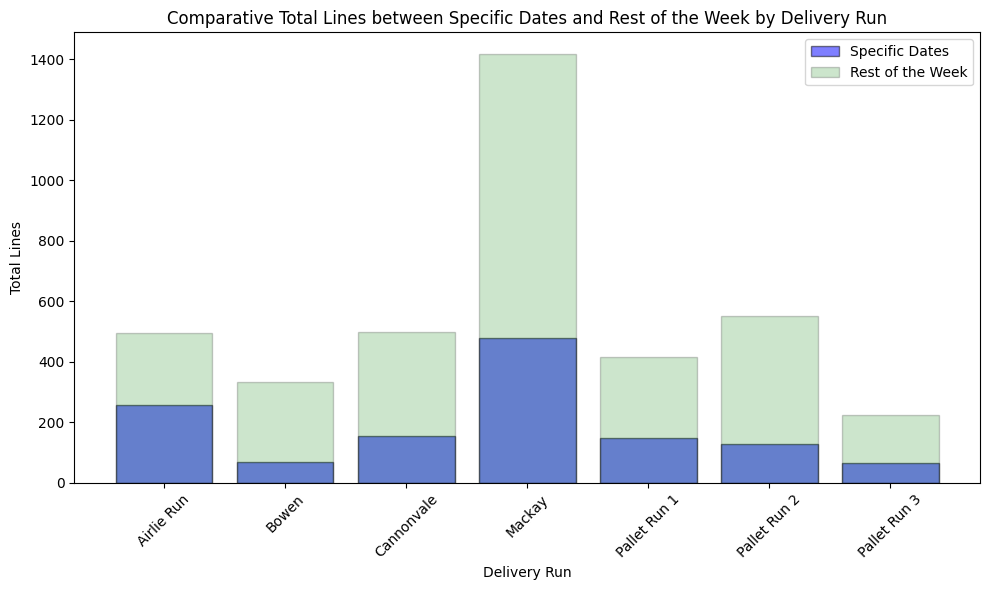

In [40]:

import matplotlib.pyplot as plt

# Calculate total 'Total Lines' for specific dates and rest of the week for each delivery run
total_lines_specific_dates = specific_dates.groupby('Delivery Run')['Total Lines'].sum()
total_lines_rest_of_week = rest_of_week.groupby('Delivery Run')['Total Lines'].sum()

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))

# Bar plot for specific dates total sum
plt.bar(total_lines_specific_dates.index, total_lines_specific_dates, color='blue', alpha=0.5, label='Specific Dates', edgecolor='black')

# Bar plot for rest of the week total sum
plt.bar(total_lines_rest_of_week.index, total_lines_rest_of_week, color='green', alpha=0.2, label='Rest of the Week', edgecolor='black')

plt.xlabel('Delivery Run')
plt.ylabel('Total Lines')
plt.title('Comparative Total Lines between Specific Dates and Rest of the Week by Delivery Run')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


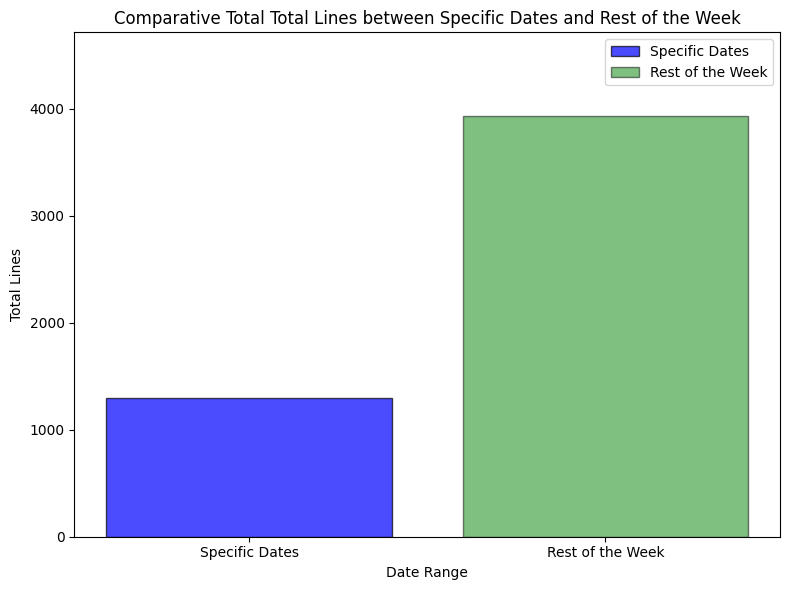

In [41]:
import matplotlib.pyplot as plt

# Assuming you have specific_dates_stats and rest_of_week_stats DataFrames

# Select the metric for comparison (e.g., 'Total Lines')
metric = 'Total Lines'

# Filter for specific delivery runs
specific_delivery_runs = ['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']

# Calculate the total sum for specific dates and rest of the week for the selected delivery runs
total_specific_dates = specific_dates_stats.loc[
    specific_dates_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs), metric
].sum()

total_rest_of_week = rest_of_week_stats.loc[
    rest_of_week_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs), metric
].sum()

# Create a bar plot for comparison
plt.figure(figsize=(8, 6))

# Bar plot for specific dates total sum
plt.bar('Specific Dates', total_specific_dates, color='blue', alpha=0.7, label='Specific Dates', edgecolor='black')

# Bar plot for rest of the week total sum
plt.bar('Rest of the Week', total_rest_of_week, color='green', alpha=0.5, label='Rest of the Week', edgecolor='black')

plt.xlabel('Date Range')
plt.ylabel(metric)
plt.title(f'Comparative Total {metric} between Specific Dates and Rest of the Week')
plt.legend()
plt.ylim(0, max(total_specific_dates, total_rest_of_week) * 1.2)  # Set y-axis limit for better visualization
plt.tight_layout()
plt.show()


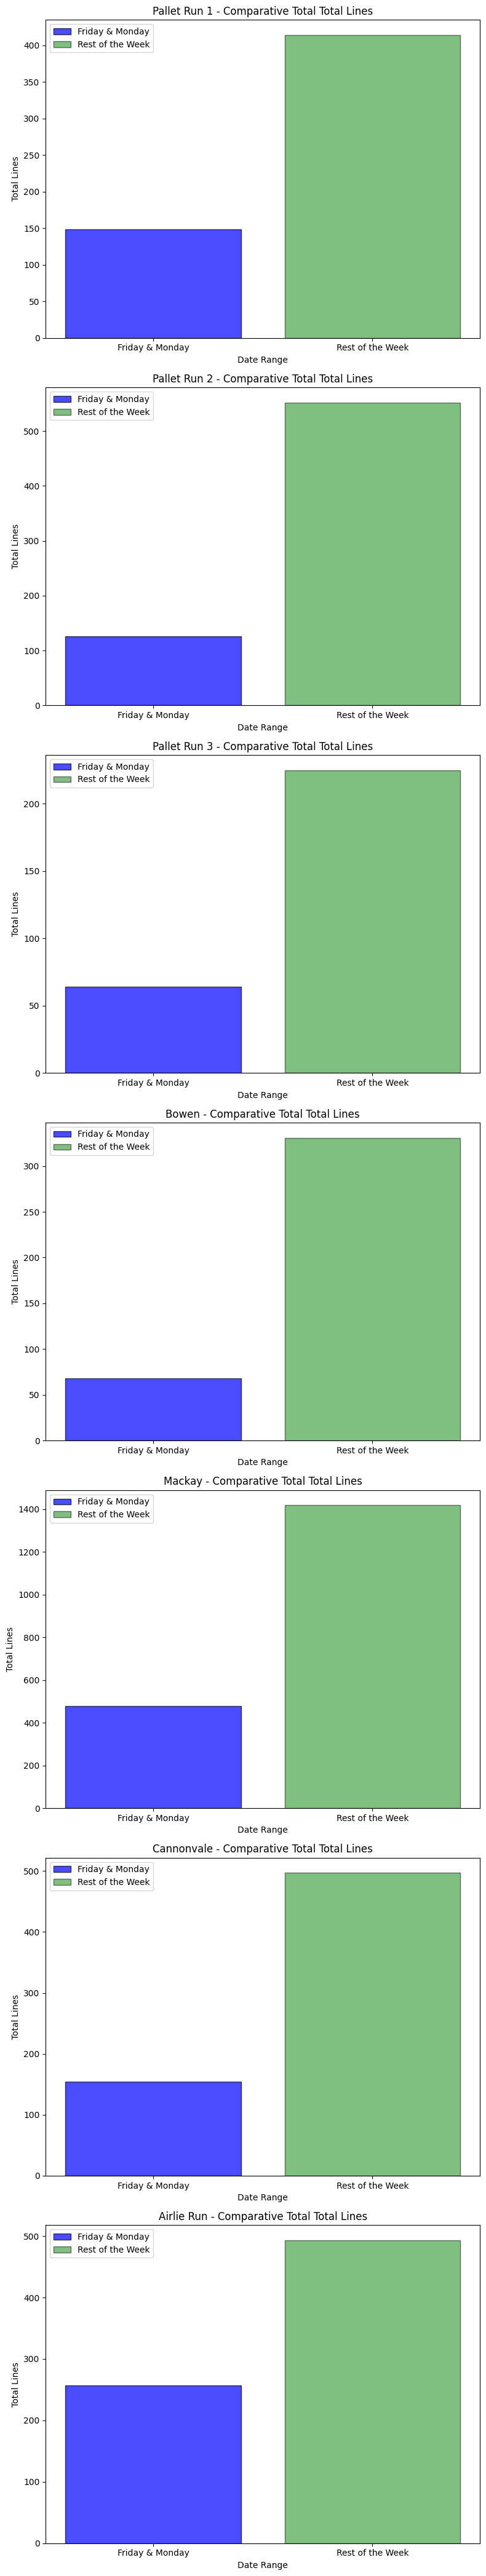

In [43]:
import matplotlib.pyplot as plt

# Assuming you have specific_dates_stats and rest_of_week_stats DataFrames

# Select the metric for comparison (e.g., 'Total Lines')
metric = 'Total Lines'

# Filter for specific delivery runs
specific_delivery_runs = ['Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Cannonvale', 'Airlie Run']

# Filter the data for specific delivery runs
specific_dates_filtered = specific_dates_stats[specific_dates_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs)]
rest_of_week_filtered = rest_of_week_stats[rest_of_week_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs)]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(specific_delivery_runs), ncols=1, figsize=(8, 6 * len(specific_delivery_runs)))

# Plot for each delivery run
for idx, delivery_run in enumerate(specific_delivery_runs):
    # Calculate total sum for specific dates and rest of the week for each delivery run
    total_specific_dates = specific_dates_filtered.loc[specific_dates_filtered.index.get_level_values('Delivery Run') == delivery_run, metric].sum()
    total_rest_of_week = rest_of_week_filtered.loc[rest_of_week_filtered.index.get_level_values('Delivery Run') == delivery_run, metric].sum()

    # Plotting the bar for each delivery run separately
    ax = axes[idx]
    ax.bar('Friday & Monday', total_specific_dates, color='blue', alpha=0.7, label='Friday & Monday', edgecolor='black')
    ax.bar('Rest of the Week', total_rest_of_week, color='green', alpha=0.5, label='Rest of the Week', edgecolor='black')

    ax.set_xlabel('Date Range')
    ax.set_ylabel(metric)
    ax.set_title(f'{delivery_run} - Comparative Total {metric}')

    ax.legend()

plt.tight_layout()
plt.show()
